In [97]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [98]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## With outliers 

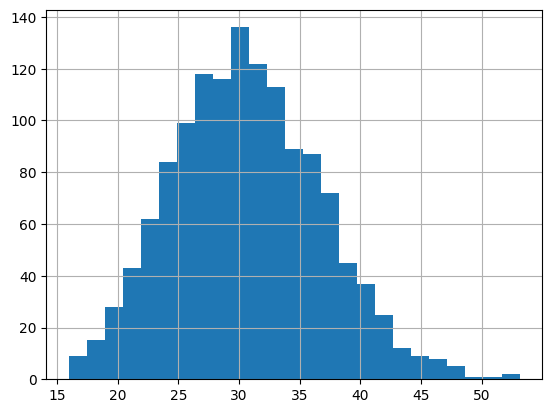

In [99]:
df["bmi"].hist(bins=25)
plt.show()

## Without outliers 1

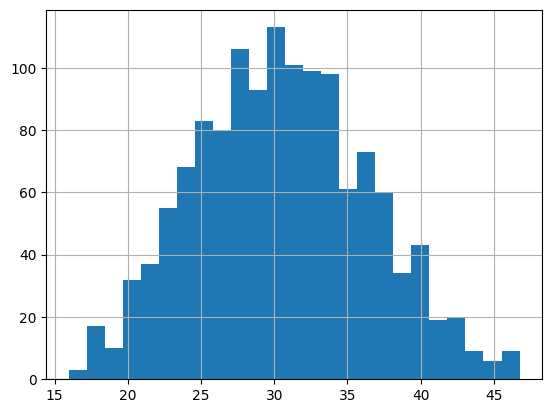

In [100]:
bmi_mean = df["bmi"].mean()
bmi_std = df["bmi"].std()
upper_limit_1=bmi_mean+2.69*bmi_std
lower_limit_1=bmi_mean-2.69*bmi_std
df_without_outliers_1=df[(df["bmi"]>=lower_limit_1)&(df['bmi']<=upper_limit_1)]
df_without_outliers_1['bmi'].hist(bins=25)
plt.show()

## Outlierlarni min maxga tenglab oldim.

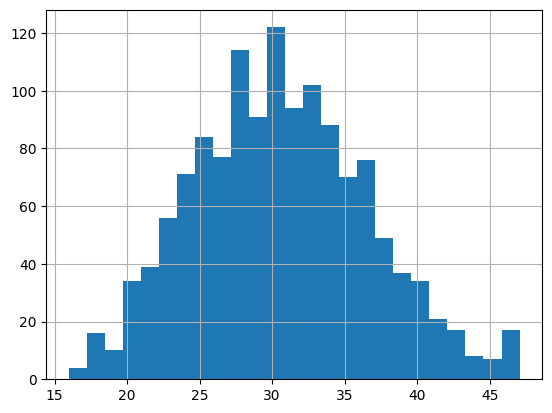

In [101]:
bmi_mean = df["bmi"].mean()
bmi_std = df["bmi"].std()
upper_limit_1=bmi_mean+2.69*bmi_std
lower_limit_1=bmi_mean-2.69*bmi_std
bmi_modified = df["bmi"].copy()
for i in range(len(bmi_modified)):
    if bmi_modified.iloc[i] > upper_limit_1:
        bmi_modified.iloc[i] = upper_limit_1
    elif bmi_modified.iloc[i] < lower_limit_1:
        bmi_modified.iloc[i] = lower_limit_1
df["bmi"] = bmi_modified
df['bmi'].hist(bins=25)
plt.show()


## Without outliers 2

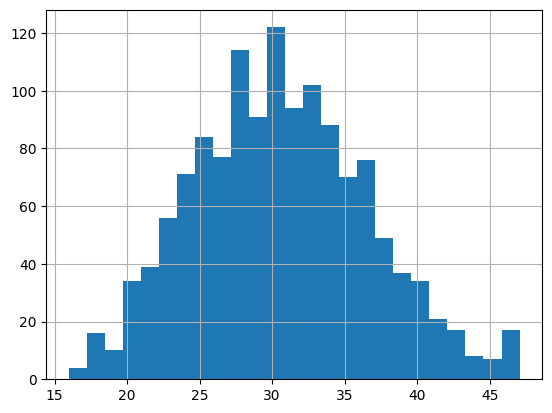

In [102]:
q3 = df['bmi'].quantile(0.75)
q1 = df['bmi'].quantile(0.25)
iqr = q3-q1
upper_limit_2 = q3 + iqr*1.5
lower_limit_2= q1 -iqr*1.5
df_without_outliers_2=df[(df["bmi"]>=lower_limit_2)&(df['bmi']<=upper_limit_2)]
df_without_outliers_2['bmi'].hist(bins=25)
plt.show()

## Outlierlarni min maxga tenglab oldim.

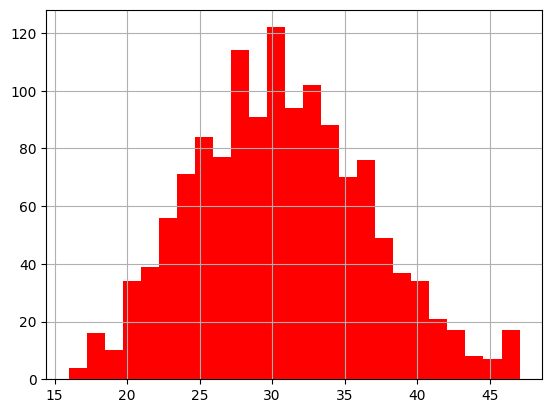

In [103]:
q3 = df['bmi'].quantile(0.75)
q1 = df['bmi'].quantile(0.25)
iqr = q3-q1
upper_limit_2 = q3 + iqr*1.5
lower_limit_2= q1 -iqr*1.5
bmi_modified = df["bmi"].copy()
for i in range(len(bmi_modified)):
    if bmi_modified.iloc[i] > upper_limit_2:
        bmi_modified.iloc[i] = upper_limit_2
    elif bmi_modified.iloc[i] < lower_limit_2:
        bmi_modified.iloc[i] = lower_limit_2
df["bmi"] = bmi_modified
df['bmi'].hist(bins=25, color="red")
plt.show()

## Without outliers 3

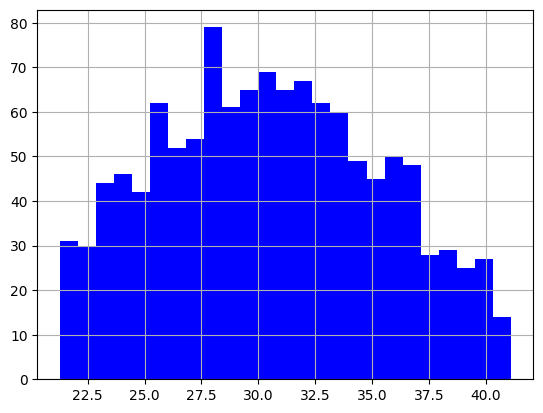

In [104]:
upper_limit_3 = df['bmi'].quantile(0.95)
lower_limit_3 = df['bmi'].quantile(0.05)
df_without_outliers_3=df[(df["bmi"]>=lower_limit_3)&(df['bmi']<=upper_limit_3)]
df_without_outliers_3['bmi'].hist(bins=25, color="blue")
plt.show()

## Outlierlarni min maxga tenglab oldim.

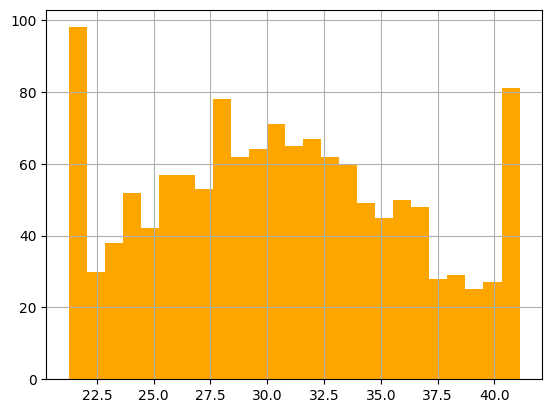

In [105]:
upper_limit_3 = df['bmi'].quantile(0.95)
lower_limit_3 = df['bmi'].quantile(0.05)
bmi_modified = df["bmi"].copy()
for i in range(len(bmi_modified)):
    if bmi_modified.iloc[i] > upper_limit_3:
        bmi_modified.iloc[i] = upper_limit_3
    elif bmi_modified.iloc[i] < lower_limit_3:
        bmi_modified.iloc[i] = lower_limit_3
df["bmi"] = bmi_modified
df['bmi'].hist(bins=25, color="orange")
plt.show()

In [106]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Gender , Smoker va region ustunlarini numeric holatga o'tkazdim.

In [110]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500
